# Supervised Learning

This is an Love and marriage at first sight dataset downloaded from Kaggle

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mafs.csv")
df.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


In [3]:
### Here there are two Dependent features 1.Decision and 2.Status
df=df.iloc[:,:-8]
df.head()

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced


# DATA CLEANING

In [4]:
df.isna().sum()

Couple        0
Season        0
Location      0
Name          0
Age           0
Gender        0
Occupation    0
Decision      0
Status        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Couple      68 non-null     int64 
 1   Season      68 non-null     int64 
 2   Location    68 non-null     object
 3   Name        68 non-null     object
 4   Age         68 non-null     int64 
 5   Gender      68 non-null     object
 6   Occupation  68 non-null     object
 7   Decision    68 non-null     object
 8   Status      68 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.2+ KB


In [6]:
df.shape

(68, 9)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Couple,Season,Age
count,68.000000,68.000000,68.000000
mean,17.500000,5.941176,29.970588
std,9.883652,2.991941,3.195008
min,1.000000,1.000000,24.000000
25%,9.000000,3.000000,27.000000
50%,17.500000,6.000000,30.000000
75%,26.000000,9.000000,32.000000
max,34.000000,10.000000,37.000000


# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
gb = pd.crosstab(df.Occupation,df.Decision)
gb.head()

Decision,No,Yes
Occupation,,
2nd grade school teacher,0,1
Account Executive,0,1
Account executive,1,0
Assistant director,0,1
Bank manager,0,1


c:\python\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


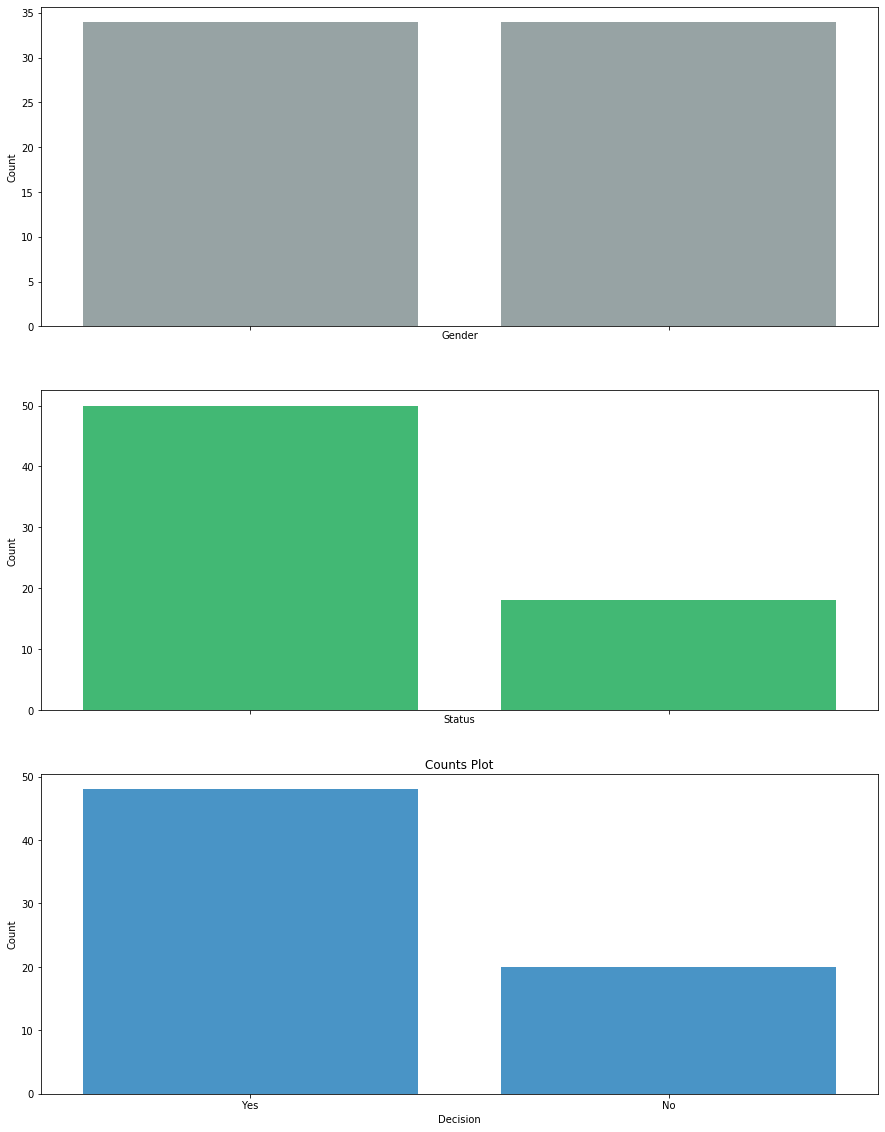

In [11]:
### Now its important to analyse the data with Visualisations
fig, ax = plt.subplots(3,1, sharex=True)
sns.countplot(df['Gender'], ax=ax[0], color="#95a5a6", order=df['Gender'].value_counts().index)
sns.countplot(df['Status'], ax=ax[1], color="#2ecc71", order=df['Status'].value_counts().index)
sns.countplot(df['Decision'], ax=ax[2], color="#3498db", order=df['Decision'].value_counts().index)
ax[0].set_xlabel("Gender")
ax[1].set_xlabel("Status")
ax[2].set_xlabel("Decision")
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
plt.title("Counts Plot")
fig.set_size_inches(15, 20)
fig.show()

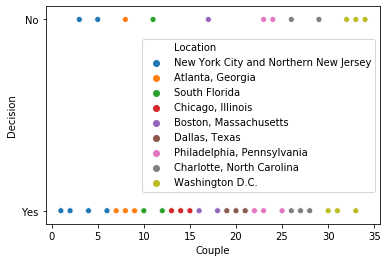

In [12]:
sns.scatterplot(x="Couple",y="Decision",hue="Location",data=df)

From the above scatterplot it is got confirmed that people in that the couple no:35 from Washington DC has equally balanced rest are not so lets see the data from Washington

In [13]:
df_Washington = df[df['Location']=='Washington D.C.']
df_Washington

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status
58,30,10,Washington D.C.,Katie Conrad,25,F,Mental Health Professional,Yes,Divorced
59,30,10,Washington D.C.,Derek Sherman,26,M,Cyber Security Engineer,Yes,Divorced
60,31,10,Washington D.C.,Jessica Studer,31,F,Nurse Manager,Yes,Married
61,31,10,Washington D.C.,Austin Hurd,31,M,Network Technician,Yes,Married
62,32,10,Washington D.C.,Taylor Dunklin,27,F,Research Scientist,No,Divorced
63,32,10,Washington D.C.,Brandon Reid,34,M,Sales Manager,No,Divorced
64,33,10,Washington D.C.,Meka Jones,25,F,Category Analyst,No,Divorced
65,33,10,Washington D.C.,Michael Watson,31,M,Education Director,Yes,Divorced
66,34,10,Washington D.C.,Mindy Shiben,34,F,Figure Skating Coach,No,Divorced
67,34,10,Washington D.C.,Zach Justice,32,M,Fitness Professional,No,Divorced


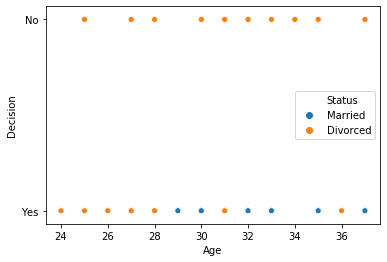

In [14]:
sns.scatterplot(x="Age",y="Decision",hue="Status",data=df)

From the above chart its been seen that below age 30 mostly divorced and mostly interested to yes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F617D70>,
      dtype=object)

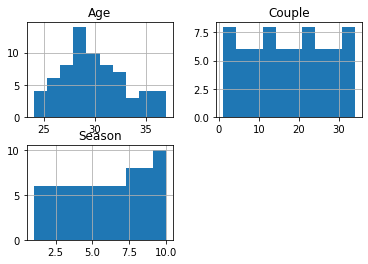

In [15]:
df.hist()

From the above histogram its clearly visible that the Age is following Gaussian distribution and Season is Right Skewed
so we need to scale the data to follow Standard Normal so our accuracy will be good

# Feature Engineering

In [16]:
data = df.copy()
### Here we are going to encode the categorical data and name is not need to be encoded because its unique Most Probably
data.drop("Name", axis=1, inplace=True)

categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
categorical_features

['Location', 'Gender', 'Occupation', 'Decision', 'Status']

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder().fit_transform(data["Location"])
encoder

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7,
       7, 7, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 6, 6,
       6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

In [19]:
encoder1 = LabelEncoder().fit_transform(data["Gender"])
encoder1

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [20]:
encoder2 = LabelEncoder().fit_transform(data["Occupation"])
encoder2

array([42, 60, 34, 26, 48, 19, 67, 49, 46, 64, 51,  7, 17, 33, 44, 59,  4,
       11, 58, 66, 28,  2, 50,  5, 15, 63, 56,  6, 35, 54, 13,  0, 10, 23,
       62, 25, 31, 65, 61, 12, 57, 29, 24, 47,  3, 22, 30,  9, 53, 32, 41,
       38,  1, 21, 45, 36, 39, 18, 37, 14, 43, 40, 52, 55,  8, 16, 20, 27])

In [21]:
encoder3 = LabelEncoder().fit_transform(data["Decision"])
encoder3

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0])

In [22]:
encoder4 = LabelEncoder().fit_transform(data["Status"])
encoder4

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [23]:
data1 = pd.DataFrame(encoder, columns=["Location"])
data1.head()

,Location
0,5
1,5
2,5
3,5
4,5


In [24]:
data1["Name"] = df["Name"]
data1["Gender"] = encoder1
data1["Occupation"]=encoder2
data1["Decision"]= encoder3
data1["Status"] = encoder4
data1.head()

,Location,Name,Gender,Occupation,Decision,Status
0,5,Jamie Otis-Hehner,0,42,1,1
1,5,Doug Hehner,1,60,1,1
2,5,Cortney Hendrix,0,34,1,0
3,5,Jason Carrion,1,26,1,0
4,5,Monet Bell,0,48,0,0


In [25]:
data.drop(categorical_features, axis=1,inplace=True)
data.head()

,Couple,Season,Age
0,1,1,27
1,1,1,31
2,2,1,26
3,2,1,27
4,3,1,33


In [26]:
df1 = pd.concat([data, data1], axis=1)
df1.head()

,Couple,Season,Age,Location,Name,Gender,Occupation,Decision,Status
0,1,1,27,5,Jamie Otis-Hehner,0,42,1,1
1,1,1,31,5,Doug Hehner,1,60,1,1
2,2,1,26,5,Cortney Hendrix,0,34,1,0
3,2,1,27,5,Jason Carrion,1,26,1,0
4,3,1,33,5,Monet Bell,0,48,0,0


In [42]:
### Now its important to seperate the Dependent and independent features
x=df1.iloc[:,:-2]
y=df1.iloc[:,-2:]
x.drop("Name",axis=1,inplace=True)

# Feature selection

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
selectbestfeatures = SelectKBest(score_func=chi2, k=3)
fit = selectbestfeatures.fit(x,y)

In [30]:
scores = pd.DataFrame(fit.scores_)
specs = pd.DataFrame(x.columns)

In [31]:
score_data = pd.concat([specs, scores],axis=1)
score_data.columns=["Specs","Score"]
score_data

,Specs,Score
0,Couple,10.119048
1,Season,1.489274
2,Age,0.574297
3,Location,2.998866
4,Gender,0.000000
5,Occupation,9.777114


In [32]:
score_data.sort_values("Score", ascending=False).head(3)

,Specs,Score
0,Couple,10.119048
5,Occupation,9.777114
3,Location,2.998866


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

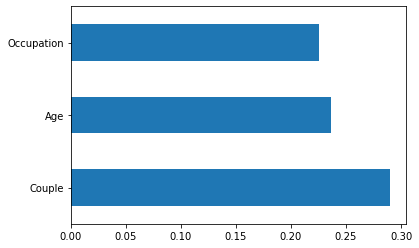

In [34]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(3).plot(kind='barh')
plt.show()

In [35]:
### So From the above two datas we need to select the important Feature
list1 = ["Gender","Location","Season"]

x.drop(list1, axis=1, inplace=True)
x.head()

,Couple,Age,Occupation
0,1,27,42
1,1,31,60
2,2,26,34
3,2,27,26
4,3,33,48


In [36]:
x["Names"] = df["Name"]
x.head()

,Couple,Age,Occupation,Names
0,1,27,42,Jamie Otis-Hehner
1,1,31,60,Doug Hehner
2,2,26,34,Cortney Hendrix
3,2,27,26,Jason Carrion
4,3,33,48,Monet Bell


# Model Selection

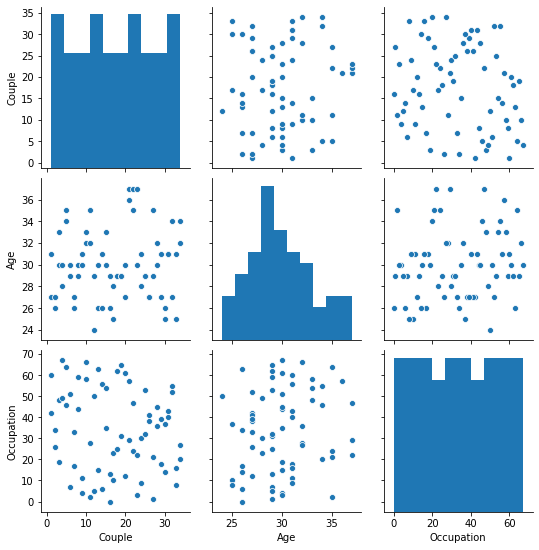

In [37]:
sns.pairplot(x)

From the above data its clearly seen the points sparsely populated so we are Going to use Random Forest Classifier and decision trees

Note: In the above EDA histogram i have said to scale the data but in Bagging and Boosting Technique there is no need to scale the data Because finally its going to Aggregate the results

# Model Development

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from random import randint

In [39]:
forestclassifier = RandomForestClassifier()
treeclassifier = DecisionTreeClassifier()

In [50]:
print(cross_val_score(forestclassifier,x,y,cv=3,scoring="accuracy").mean())
print(cross_val_score(treeclassifier,x,y,cv=3,scoring="accuracy").mean())

0.4235836627140975
0.3662714097496706


Since the Random forest has more accuracy we need to use random forest but for the better accuracy we are going to do the Hyperparamtre tuning

In [47]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
print((x_train.shape,y_train.shape),(x_test.shape,y_test.shape))

((51, 6), (51, 2)) ((17, 6), (17, 2))


In [51]:
classifier = RandomForestClassifier()

In [59]:
parametres = {"n_estimators" : [10,100,1000],
              "criterion" : ["gini", "entropy"],
              "max_features" : [1,2,3],
              "max_depth" : [3,5,10,"None"],
              "min_samples_leaf" : [1,2,3],
              "bootstrap" : ["True","False"]}

In [60]:
gridsearchcv = GridSearchCV(classifier, parametres,scoring="accuracy",cv=3,n_jobs=-1)

In [61]:
gridsearchcv.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [62]:
gridsearchcv.best_score_

0.5882352941176471

In [63]:
gridsearchcv.best_params_

{'bootstrap': 'False',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 10}

The Grid Search CV has given as best parametres

Note : the dependent feature has Multiple outputs so we need to use Multioutput classifier to improve accuracy

In [71]:
forestclassifier = RandomForestClassifier(bootstrap ='False',
                                          criterion ='gini',
                                          max_depth =  3,
                                          max_features =  2,
                                          min_samples_leaf =  2,
                                          n_estimators = 10)

In [72]:
from sklearn.multioutput import MultiOutputClassifier

In [73]:
output = MultiOutputClassifier(forestclassifier)
output.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap='False',
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=3,
                                                       max_features=2,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                       

In [75]:
y_pred = output.predict(x_test)

# Accuracy

In [76]:
from sklearn.metrics import classification_report

In [78]:
#matrix = confusion_matrix(y_pred,y_test)
report = classification_report(y_pred,y_test)

c:\python\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.17      0.50      0.25         2

   micro avg       0.56      0.62      0.59        16
   macro avg       0.46      0.57      0.47        16
weighted avg       0.68      0.62      0.64        16
 samples avg       0.41      0.53      0.45        16



# Using Pipelines

This is just a alternate to the previous just for knowledge im working with it

In [98]:
pipe =  Pipeline([("Classifier", RandomForestClassifier())])

parametres = [{"Classifier" : [RandomForestClassifier()],
               "Classifier__n_estimators" : [10,100,1000],
               "Classifier__criterion" : ["gini", "entropy"],
               "Classifier__max_features" : [1,2,3],
               "Classifier__max_depth" : [3,5,10,"None"],
               "Classifier__min_samples_leaf" : [1,2,3],
               "Classifier__bootstrap" : ["True","False"]
              },
             
              {"Classifier" : [DecisionTreeClassifier()],
               "Classifier__splitter" : ["best", "random"], 
               "Classifier__criterion" : ["gini", "entropy"],
               "Classifier__max_features" : [1,2,3],
               "Classifier__max_depth" : [3,5,10,"None"],
               "Classifier__min_samples_leaf" : [1,2,3]
               }]

In [100]:
gridsearchcv = GridSearchCV(pipe, parametres,cv=3,n_jobs=-1)
best_model = gridsearchcv.fit(x_train, y_train)

In [102]:
print(best_model.best_estimator_)
print("The accuracy of best model is:",best_model.score(x_test, y_test))

Pipeline(memory=None,
         steps=[('Classifier',
                 RandomForestClassifier(bootstrap='False', ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features=3,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
The accuracy of best model is: 0.23529411764705882


This is what the best estimator 